# Projet Data Mining

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
np.set_printoptions(threshold=np.inf)
import pandas as pd
pd.set_option('display.max_rows', 100)
import matplotlib.pyplot as plt
import networkx as nx

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/data/DataMining/transfers.csv', sep=',')

## Analyse initiale

In [ ]:
data

,league,season,window,team_id,team_name,team_country,dir,player_id,player_name,player_age,...,counter_team_id,counter_team_name,counter_team_country,transfer_fee_amnt,market_val_amnt,is_free,is_loan,is_loan_end,is_retired,transfer_id
0,GB1,2009,s,985,Manchester United,England,in,33544,Antonio Valencia,23.0,...,1071,Wigan Athletic,England,18800000.0,NaN,False,False,False,False,310832
1,GB1,2009,s,985,Manchester United,England,in,62049,Mame Diouf,21.0,...,687,Molde FK,Norway,4500000.0,1600000.0,False,False,False,False,319841
2,GB1,2009,s,985,Manchester United,England,in,43261,Gabriel Obertan,20.0,...,40,FC Girondins Bordeaux,France,4000000.0,400000.0,False,False,False,False,315185
3,GB1,2009,s,985,Manchester United,England,in,1397,Michael Owen,29.0,...,762,Newcastle United,England,0.0,NaN,True,False,False,False,306421
4,GB1,2009,s,985,Manchester United,England,in,73538,Scott Moffatt,18.0,...,5242,Manchester United U18,England,NaN,NaN,False,False,False,False,339015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70001,NL1,2021,w,306,SC Heerenveen,Netherlands,in,257808,Runar Espejord,25.0,...,1293,Tromsø IL,Norway,NaN,500000.0,False,True,True,False,3071862
70002,NL1,2021,w,306,SC Heerenveen,Netherlands,in,580142,Joaquín Fernández,22.0,...,37535,Montevideo City Torque,Uruguay,NaN,100000.0,False,True,True,False,3268245
70003,NL1,2021,w,468,Sparta Rotterdam,Netherlands,in,340353,Maduka Okoye,22.0,...,1010,Watford FC,England,NaN,1000000.0,False,True,False,False,3619917
70004,NL1,2021,w,468,Sparta Rotterdam,Netherlands,left,340353,Maduka Okoye,22.0,...,1010,Watford FC,England,7000000.0,1000000.0,False,False,False,False,3619916


In [ ]:
# Transfert lié a Cristiano Ronaldo
data.loc[data['player_name'] == 'Cristiano Ronaldo']

,league,season,window,team_id,team_name,team_country,dir,player_id,player_name,player_age,...,counter_team_id,counter_team_name,counter_team_country,transfer_fee_amnt,market_val_amnt,is_free,is_loan,is_loan_end,is_retired,transfer_id
12,GB1,2009,s,985,Manchester United,England,left,8198,Cristiano Ronaldo,24.0,...,418,Real Madrid,Spain,94000000.0,45000000.0,False,False,False,False,308498
10942,GB1,2021,s,985,Manchester United,England,in,8198,Cristiano Ronaldo,36.0,...,506,Juventus FC,Italy,15000000.0,45000000.0,False,False,False,False,3527714
11443,ES1,2009,s,418,Real Madrid,Spain,in,8198,Cristiano Ronaldo,24.0,...,985,Manchester United,England,94000000.0,45000000.0,False,False,False,False,308498
17390,ES1,2018,s,418,Real Madrid,Spain,left,8198,Cristiano Ronaldo,33.0,...,506,Juventus FC,Italy,117000000.0,45000000.0,False,False,False,False,2168965
32099,IT1,2018,s,506,Juventus FC,Italy,in,8198,Cristiano Ronaldo,33.0,...,418,Real Madrid,Spain,117000000.0,45000000.0,False,False,False,False,2168965
35294,IT1,2021,s,506,Juventus FC,Italy,left,8198,Cristiano Ronaldo,36.0,...,985,Manchester United,England,15000000.0,45000000.0,False,False,False,False,3527714


In [ ]:
data.loc[data['player_age'] == 12.0]

,league,season,window,team_id,team_name,team_country,dir,player_id,player_name,player_age,...,counter_team_id,counter_team_name,counter_team_country,transfer_fee_amnt,market_val_amnt,is_free,is_loan,is_loan_end,is_retired,transfer_id
66684,NL1,2016,s,1269,PEC Zwolle,Netherlands,in,694038,Jamairo Appiah,12.0,...,515,Without Club,Without Club,NaN,NaN,False,False,False,False,2602688


In [ ]:
#Taille des données
nb_devis = data.shape[0]
nb_colonnes = data.shape[1]
print("Nombre de lignes :", nb_devis)
print("Nombre de variables :", nb_colonnes)

Nombre de lignes : 70006
Nombre de variables : 23


In [ ]:
data.columns

Index(['league', 'season', 'window', 'team_id', 'team_name', 'team_country',
       'dir', 'player_id', 'player_name', 'player_age', 'player_nation',
       'player_nation2', 'player_pos', 'counter_team_id', 'counter_team_name',
       'counter_team_country', 'transfer_fee_amnt', 'market_val_amnt',
       'is_free', 'is_loan', 'is_loan_end', 'is_retired', 'transfer_id'],
      dtype='object')

In [ ]:
data.dtypes

league                   object
season                    int64
window                   object
team_id                   int64
team_name                object
team_country             object
dir                      object
player_id                 int64
player_name              object
player_age              float64
player_nation            object
player_nation2           object
player_pos               object
counter_team_id          object
counter_team_name        object
counter_team_country     object
transfer_fee_amnt       float64
market_val_amnt         float64
is_free                    bool
is_loan                    bool
is_loan_end                bool
is_retired                 bool
transfer_id               int64
dtype: object

### Proportions

Text(0.5, 1.0, 'Ligue concernée par le transfert')

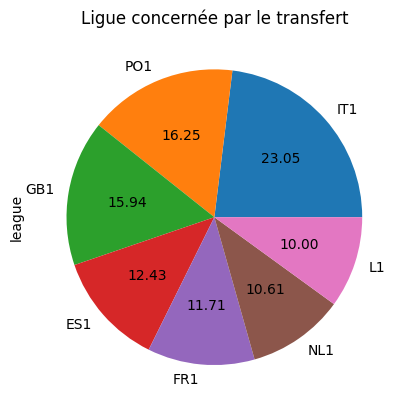

In [ ]:
data['league'].value_counts().plot.pie(autopct='%.2f')
plt.title('Ligue concernée par le transfert')

IT1 : Ligue 1 italienne

GB1 : Ligue 1 anglaise

FR1 : Ligue 1 française

ES1 : Ligue 1 espagnole

NL1 : Ligue 1 néerlandaise

PO1 : Ligue 1 portugaise

L1 : Ligue 1 allemande

Text(0.5, 1.0, 'Année du transfert')

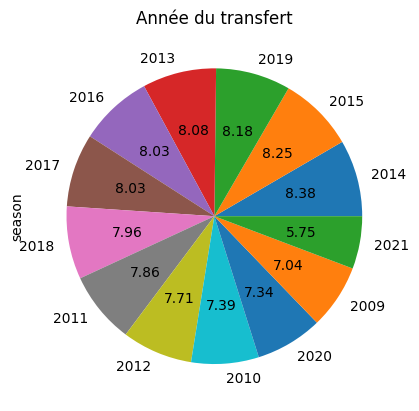

In [ ]:
data['season'].value_counts().plot.pie(autopct='%.2f')
plt.title('Année du transfert')

<Axes: ylabel='window'>

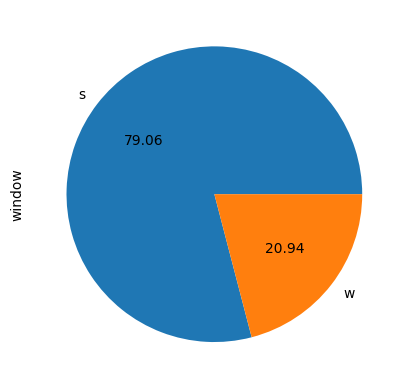

In [ ]:
data['window'].value_counts().plot.pie(autopct='%.2f')

In [ ]:
data['team_name'].value_counts()

Genoa CFC                 1177
Parma FC                  1021
SL Benfica                 918
Atalanta BC                871
Udinese Calcio             854
                          ... 
Eintracht Braunschweig      20
Brentford FC                20
GFC Ajaccio                 19
CD Tenerife                 14
FC St. Pauli                12
Name: team_name, Length: 243, dtype: int64

<Axes: ylabel='team_country'>

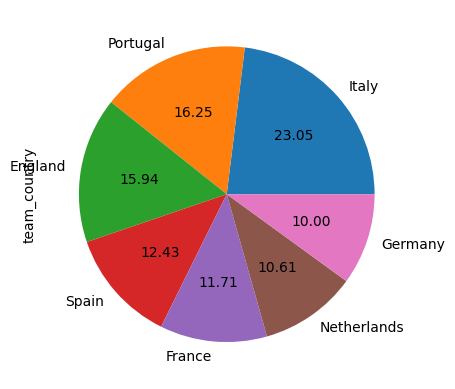

In [ ]:
data['team_country'].value_counts().plot.pie(autopct='%.2f')

<Axes: ylabel='dir'>

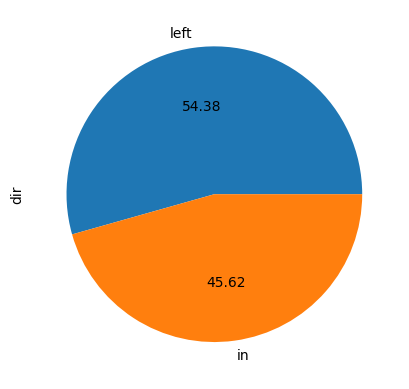

In [ ]:
data['dir'].value_counts().plot.pie(autopct='%.2f')

<Axes: ylabel='player_age'>

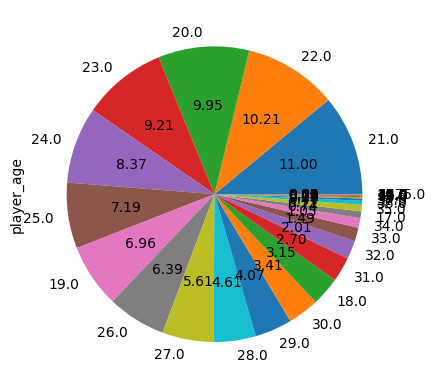

In [ ]:
data['player_age'].value_counts().plot.pie(autopct='%.2f')

<Axes: ylabel='player_nation'>

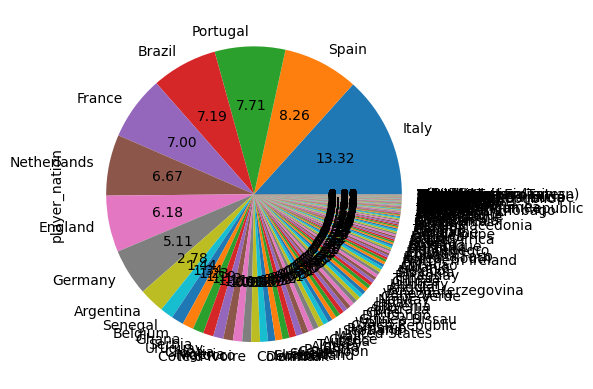

In [ ]:
data['player_nation'].value_counts().plot.pie(autopct='%.2f')

<Axes: ylabel='player_nation2'>

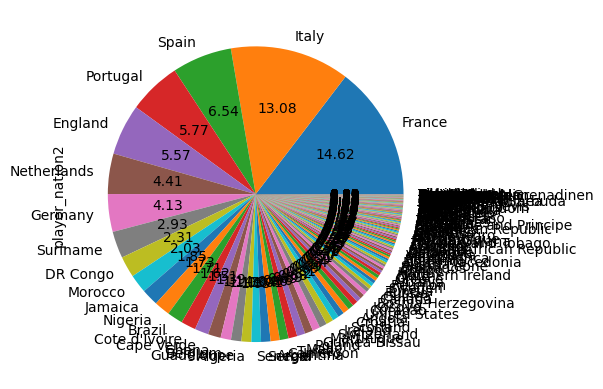

In [ ]:
data['player_nation2'].value_counts().plot.pie(autopct='%.2f')

<Axes: ylabel='player_pos'>

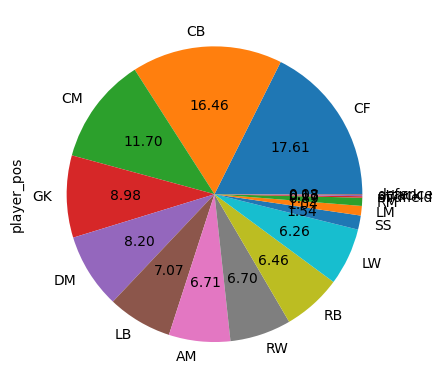

In [ ]:
data['player_pos'].value_counts().plot.pie(autopct='%.2f')

<Axes: ylabel='counter_team_name'>

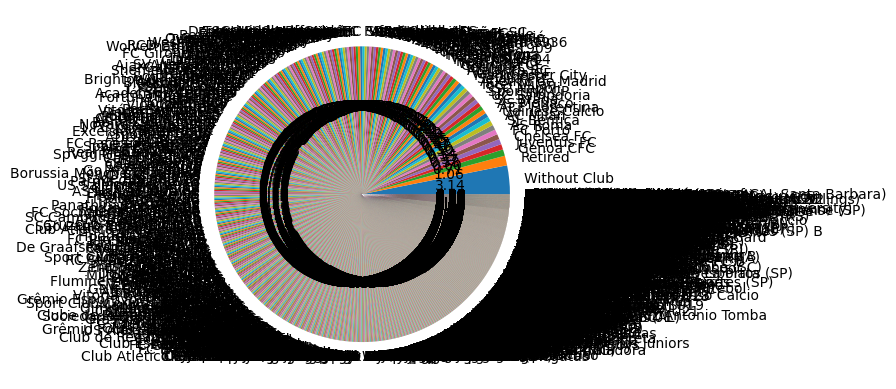

In [ ]:
data['counter_team_name'].value_counts().plot.pie(autopct='%.2f')

Text(0.5, 1.0, 'Montant des transferts')

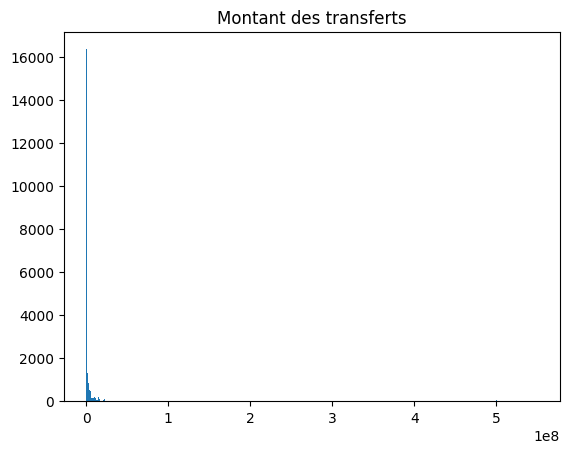

In [ ]:
plt.hist(data['transfer_fee_amnt'], bins=1000)
plt.title('Montant des transferts')

Text(0.5, 1.0, 'Montant des valeurs du marché')

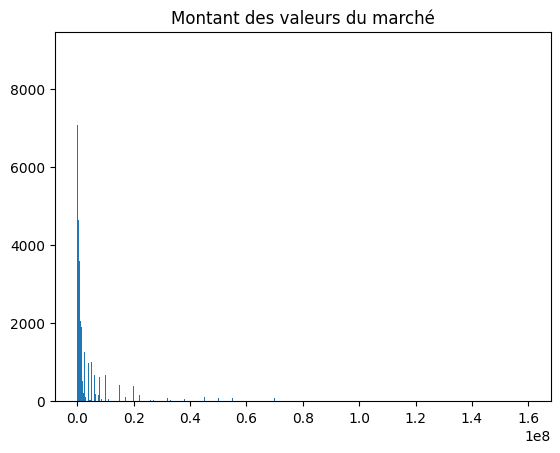

In [ ]:
plt.hist(data['market_val_amnt'], bins=1000)
plt.title('Montant des valeurs du marché')

<Axes: ylabel='is_free'>

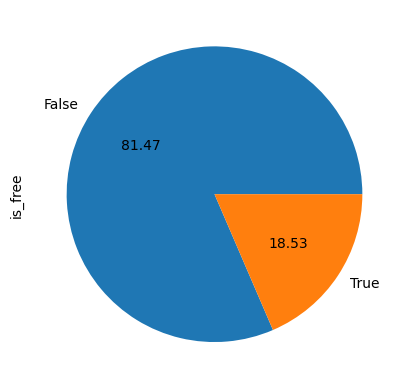

In [ ]:
data['is_free'].value_counts().plot.pie(autopct='%.2f')

<Axes: ylabel='is_loan'>

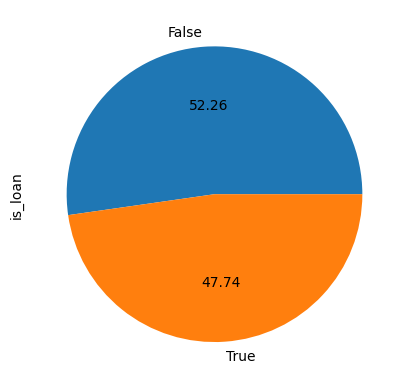

In [ ]:
data['is_loan'].value_counts().plot.pie(autopct='%.2f')

<Axes: ylabel='is_loan_end'>

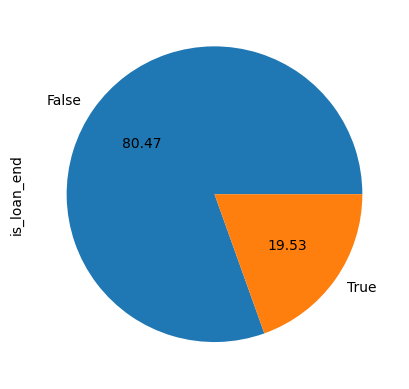

In [ ]:
data['is_loan_end'].value_counts().plot.pie(autopct='%.2f')

<Axes: ylabel='is_retired'>

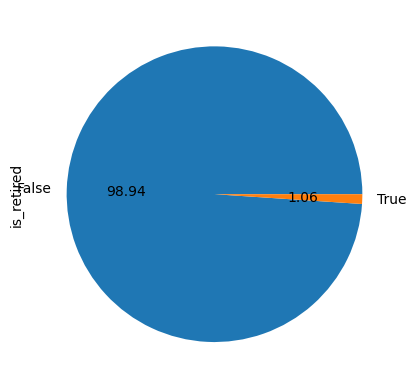

In [ ]:
data['is_retired'].value_counts().plot.pie(autopct='%.2f')

In [ ]:
data.groupby(['league'])['transfer_fee_amnt'].sum().sort_values(ascending=False)


league
IT1    3.732923e+10
GB1    2.479891e+10
ES1    1.464766e+10
FR1    1.094465e+10
L1     1.082807e+10
PO1    4.752688e+09
NL1    3.030544e+09
Name: transfer_fee_amnt, dtype: float64

In [ ]:
data.groupby(['league'])['transfer_fee_amnt'].mean().sort_values(ascending=False)

league
GB1    6.290946e+06
IT1    5.850977e+06
ES1    3.982507e+06
FR1    3.125256e+06
L1     2.885178e+06
PO1    1.261329e+06
NL1    9.353531e+05
Name: transfer_fee_amnt, dtype: float64

## Utilisation de Gephi

In [ ]:
import networkx as nx

In [ ]:
G = nx.DiGraph()

In [ ]:
dataGraph = data['team_name']

In [ ]:
dataGraph

0        Manchester United
1        Manchester United
2        Manchester United
3        Manchester United
4        Manchester United
               ...        
70001        SC Heerenveen
70002        SC Heerenveen
70003     Sparta Rotterdam
70004     Sparta Rotterdam
70005       Vitesse Arnhem
Name: team_name, Length: 70006, dtype: object

In [ ]:
#Ajout des noeuds
clubs = data['team_name'].unique()
G.add_nodes_from(clubs)

In [ ]:
import pandas as pd
import networkx as nx


# Créez un graphe dirigé
G = nx.DiGraph()

# Parcourez les données et ajoutez des nœuds et des arêtes avec des poids
for index, row in data.iterrows():
    if row['dir'] == 'in':
        source = row['counter_team_name']
        target = row['team_name']
    else:
        source = row['team_name']
        target = row['counter_team_name']

    transfer_fee = row['transfer_fee_amnt']  # Récupérez le prix du transfert depuis la colonne

    G.add_node(source)
    G.add_node(target)
    G.add_edge(source, target, weight=transfer_fee)  # Définissez le poids de l'arête comme le prix du transfert


In [ ]:
nx.write_gexf(G, "transfers.gexf")

In [ ]:
data_sorted = data.sort_values(by='transfer_fee_amnt', ascending=False)


In [ ]:
data_sorted

,league,season,window,team_id,team_name,team_country,dir,player_id,player_name,player_age,...,counter_team_id,counter_team_name,counter_team_country,transfer_fee_amnt,market_val_amnt,is_free,is_loan,is_loan_end,is_retired,transfer_id
21001,IT1,2010,s,1627,Calcio Catania,Italy,left,41312,Simone Pesce,28.0,...,408,Ascoli Calcio 1898,Italy,550000000.0,200000.0,False,False,False,False,590135
22731,IT1,2011,s,252,Genoa CFC,Italy,in,91914,Davide Bertoncini,21.0,...,1408,Piacenza FC,Italy,550000000.0,300000.0,False,False,False,False,735935
20142,IT1,2009,s,130,Parma FC,Italy,left,28030,Luca Tedeschi,22.0,...,1103,Ternana Calcio,Italy,500000000.0,75000.0,False,False,False,False,3451466
21045,IT1,2010,s,1429,AC Cesena,Italy,left,199888,Caio De Cenco,21.0,...,10643,AC Bellaria Igea Marina,Italy,500000000.0,250000.0,False,False,False,False,743456
20719,IT1,2009,w,458,US Palermo,Italy,left,68862,Luca Di Matteo,21.0,...,2655,Vicenza Calcio,Italy,500000000.0,25000.0,False,False,False,False,389241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70000,NL1,2021,w,385,Fortuna Sittard,Netherlands,in,140032,Andreas Samaris,32.0,...,515,Without Club,Without Club,NaN,1500000.0,False,False,False,False,3633188
70001,NL1,2021,w,306,SC Heerenveen,Netherlands,in,257808,Runar Espejord,25.0,...,1293,Tromsø IL,Norway,NaN,500000.0,False,True,True,False,3071862
70002,NL1,2021,w,306,SC Heerenveen,Netherlands,in,580142,Joaquín Fernández,22.0,...,37535,Montevideo City Torque,Uruguay,NaN,100000.0,False,True,True,False,3268245
70003,NL1,2021,w,468,Sparta Rotterdam,Netherlands,in,340353,Maduka Okoye,22.0,...,1010,Watford FC,England,NaN,1000000.0,False,True,False,False,3619917


In [ ]:
test = data_sorted.head(50)

In [ ]:
test

,league,season,window,team_id,team_name,team_country,dir,player_id,player_name,player_age,...,counter_team_id,counter_team_name,counter_team_country,transfer_fee_amnt,market_val_amnt,is_free,is_loan,is_loan_end,is_retired,transfer_id
21001,IT1,2010,s,1627,Calcio Catania,Italy,left,41312,Simone Pesce,28.0,...,408,Ascoli Calcio 1898,Italy,550000000.0,200000.0,False,False,False,False,590135
22731,IT1,2011,s,252,Genoa CFC,Italy,in,91914,Davide Bertoncini,21.0,...,1408,Piacenza FC,Italy,550000000.0,300000.0,False,False,False,False,735935
20142,IT1,2009,s,130,Parma FC,Italy,left,28030,Luca Tedeschi,22.0,...,1103,Ternana Calcio,Italy,500000000.0,75000.0,False,False,False,False,3451466
21045,IT1,2010,s,1429,AC Cesena,Italy,left,199888,Caio De Cenco,21.0,...,10643,AC Bellaria Igea Marina,Italy,500000000.0,250000.0,False,False,False,False,743456
20719,IT1,2009,w,458,US Palermo,Italy,left,68862,Luca Di Matteo,21.0,...,2655,Vicenza Calcio,Italy,500000000.0,25000.0,False,False,False,False,389241
23793,IT1,2012,s,1627,Calcio Catania,Italy,left,233654,Francesco Fedato,19.0,...,332,AS Bari,Italy,500000000.0,150000.0,False,False,False,False,2263419
22176,IT1,2011,s,1429,AC Cesena,Italy,left,83374,Sacha Cori,22.0,...,4159,Carrarese Calcio 1908,Italy,500000000.0,275000.0,False,False,False,False,2456642
20774,IT1,2009,w,252,Genoa CFC,Italy,left,62270,Danilo Russo,22.0,...,2655,Vicenza Calcio,Italy,500000000.0,100000.0,False,False,False,False,380537
22087,IT1,2011,s,6195,SSC Napoli,Italy,in,21690,Daniele Mannini,27.0,...,1038,UC Sampdoria,Italy,500000000.0,NaN,False,False,False,False,590138
24136,IT1,2012,s,2921,Delfino Pescara 1936,Italy,in,164088,Luca Berardocco,21.0,...,4172,AC Pisa 1909,Italy,500000000.0,300000.0,False,False,False,False,734226


Problme dans le dataset, certain joueurs on a un prix de trop élévé du a une erreur sur le dite trasfertmarkt, 2 choix : supprimer les ligne ou modifer pour remettre le bon prix, pour le momment on supprime.

In [ ]:
data = data[data['transfer_fee_amnt'] <= 222000000.0]

In [ ]:
data_sorted = data.sort_values(by='transfer_fee_amnt', ascending=False)

In [ ]:
data_sorted

,league,season,window,team_id,team_name,team_country,dir,player_id,player_name,player_age,...,counter_team_id,counter_team_name,counter_team_country,transfer_fee_amnt,market_val_amnt,is_free,is_loan,is_loan_end,is_retired,transfer_id
48250,FR1,2017,s,583,Paris Saint-Germain,France,in,68290,Neymar,25.0,...,131,FC Barcelona,Spain,222000000.0,100000000.0,False,False,False,False,1866385
16321,ES1,2017,s,131,FC Barcelona,Spain,left,68290,Neymar,25.0,...,583,Paris Saint-Germain,France,222000000.0,100000000.0,False,False,False,False,1866385
48811,FR1,2018,s,162,AS Monaco,France,left,342229,Kylian Mbappé,19.0,...,583,Paris Saint-Germain,France,145000000.0,160000000.0,False,False,False,False,2101599
48916,FR1,2018,s,583,Paris Saint-Germain,France,in,342229,Kylian Mbappé,19.0,...,162,AS Monaco,France,145000000.0,160000000.0,False,False,False,False,2101599
16311,ES1,2017,s,131,FC Barcelona,Spain,in,288230,Ousmane Dembélé,20.0,...,16,Borussia Dortmund,Germany,135000000.0,50000000.0,False,False,False,False,1893861
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25669,IT1,2013,s,46,FC Internazionale,Italy,in,36356,Marco Andreolli,27.0,...,862,Chievo Verona,Italy,0.0,NaN,True,False,False,False,864414
45936,FR1,2014,s,40,FC Girondins Bordeaux,France,left,33572,Henrique,31.0,...,2462,Fluminense Football Club,Brazil,0.0,NaN,True,False,False,False,1061906
45937,FR1,2014,s,40,FC Girondins Bordeaux,France,left,3115,David Bellion,31.0,...,1154,Red Star FC,France,0.0,NaN,True,False,False,False,1078040
45938,FR1,2014,s,40,FC Girondins Bordeaux,France,left,5339,Jérémie Bréchet,35.0,...,3558,GFC Ajaccio,France,0.0,NaN,True,False,False,False,1079868


In [ ]:
import pandas as pd
import networkx as nx

# Créez un graphe dirigé
G = nx.DiGraph()

# Parcourez les données et ajoutez des nœuds avec l'attribut "country"
for index, row in data.iterrows():
    if row['dir'] == 'in':
        team_name = row['team_name']
        team_country = row['team_country']
        #print(team_name,league)
    else:
        team_name = row['counter_team_name']
        team_country = row['counter_team_country']

    #print(team_name,team_country,row['dir'])

    if not G.has_node(team_name):  # Vérifiez si le nœud existe déjà
        G.add_node(team_name, team_country=team_country)


# Parcourez à nouveau les données et ajoutez les arêtes avec les poids
for index, row in data.iterrows():
    if row['dir'] == 'in':
        source = row['counter_team_name']
        target = row['team_name']
    else:
        source = row['team_name']
        target = row['counter_team_name']

    transfer_fee = row['transfer_fee_amnt']  # Récupérez le prix du transfert depuis la colonne

        # Vérifiez si l'arête existe déjà
    if G.has_edge(source, target):
        # Si l'arête existe déjà, ajoutez simplement le montant du transfert au poids existant
        G[source][target]['weight'] += transfer_fee
    else:
        # Sinon, ajoutez une nouvelle arête avec le montant du transfert spécifié
        G.add_edge(source, target, weight=transfer_fee)

# Divisez tous les poids des liens par 2
for edge in G.edges:
    G[edge[0]][edge[1]]['weight'] /= 2

nx.write_gexf(G, "transfersSum.gexf")


In [ ]:
data[(data['team_name'] == 'Paris Saint-Germain') & (data['counter_team_name'] == 'Olympique Lyon') | (data['team_name'] == 'Olympique Lyon') & (data['counter_team_name'] == 'Paris Saint-Germain')]

,league,season,window,team_id,team_name,team_country,dir,player_id,player_name,player_age,...,counter_team_id,counter_team_name,counter_team_country,transfer_fee_amnt,market_val_amnt,is_free,is_loan,is_loan_end,is_retired,transfer_id
43648,FR1,2010,s,1041,Olympique Lyon,France,left,27305,Mathieu Bodmer,27.0,...,583,Paris Saint-Germain,France,2500000.0,NaN,False,False,False,False,438960
43969,FR1,2010,s,583,Paris Saint-Germain,France,in,27305,Mathieu Bodmer,27.0,...,1041,Olympique Lyon,France,2500000.0,NaN,False,False,False,False,438960
44740,FR1,2012,s,1041,Olympique Lyon,France,in,24661,Milan Bisevac,28.0,...,583,Paris Saint-Germain,France,2750000.0,NaN,False,False,False,False,769843
45060,FR1,2012,s,583,Paris Saint-Germain,France,left,24661,Milan Bisevac,28.0,...,1041,Olympique Lyon,France,2750000.0,NaN,False,False,False,False,769843
46053,FR1,2014,s,1041,Olympique Lyon,France,in,28335,Christophe Jallet,30.0,...,583,Paris Saint-Germain,France,1500000.0,NaN,False,False,False,False,1093872
46239,FR1,2014,s,583,Paris Saint-Germain,France,left,28335,Christophe Jallet,30.0,...,1041,Olympique Lyon,France,1500000.0,NaN,False,False,False,False,1093872


modifier 1er graph pour prendre en compte les montants cumulés des transferts

creer 2e graph pour compter le nombre de tranferts par lien

In [ ]:
dataTeam = data[['team_name', 'counter_team_name','transfer_id']]

In [ ]:
dataTeam

,team_name,counter_team_name,transfer_id
0,Manchester United,Wigan Athletic,310832
1,Manchester United,Molde FK,319841
2,Manchester United,FC Girondins Bordeaux,315185
3,Manchester United,Newcastle United,306421
12,Manchester United,Real Madrid,308498
...,...,...,...
69988,Willem II Tilburg,AZ Alkmaar,3431541
69989,Willem II Tilburg,FC Den Bosch,3529980
69990,Willem II Tilburg,FC Den Bosch,3313161
69991,Willem II Tilburg,Caykur Rizespor,3386222


In [ ]:
dataTeamC = dataTeam.groupby(['team_name', 'counter_team_name']).count()

In [ ]:
dataTeamC = data.groupby(['team_name', 'counter_team_name','dir']).size().reset_index(name='count')

In [ ]:
dataTeamC = data.groupby(['team_name', 'counter_team_name','dir']).size().reset_index(name='count')

In [ ]:
dataTeamC

,team_name,counter_team_name,dir,count
0,1. FC Köln,1.FC Heidenheim 1846,left,1
1,1. FC Köln,1.FC Kaiserslautern,in,2
2,1. FC Köln,1.FC Kaiserslautern,left,1
3,1. FC Köln,1.FC Nuremberg,left,4
4,1. FC Köln,1.FC Union Berlin,in,1
...,...,...,...,...
21005,Wolverhampton Wanderers,Tottenham Hotspur,left,1
21006,Wolverhampton Wanderers,Wigan Athletic,left,1
21007,Xerez CD,Córdoba CF,left,1
21008,Xerez CD,Getafe CF,left,1


In [ ]:
import pandas as pd
import networkx as nx

# Créez un graphe dirigé
G = nx.DiGraph()

# Parcourez les données et ajoutez des nœuds avec l'attribut "country"
for index, row in data.iterrows():
    if row['dir'] == 'in':
        team_name = row['team_name']
        team_country = row['team_country']
    else:
        team_name = row['counter_team_name']
        team_country = row['counter_team_country']

    if not G.has_node(team_name):  # Vérifiez si le nœud existe déjà
        G.add_node(team_name, team_country=team_country)


# Parcourez à nouveau les données et ajoutez les arêtes avec les poids
for index, row in dataTeamC.iterrows():
    if row['dir'] == 'in':
        source = row['counter_team_name']
        target = row['team_name']
    else:
        source = row['team_name']
        target = row['counter_team_name']

    count = row['count']  # Récupérez le prix du transfert depuis la colonne

    if not G.has_edge(source, target):
      G.add_edge(source, target, weight=count)

nx.write_gexf(G, "transfersCount.gexf")

In [ ]:
nombre_d_arêtes = G.number_of_edges()

In [ ]:
nombre_d_arêtes

0

In [ ]:
import pandas as pd


# Créez un DataFrame groupé pour stocker le montant total des transferts et le nombre de transferts
dataTeamC = data.groupby(['team_name', 'counter_team_name', 'dir']).agg({'transfer_fee_amnt': ['size', 'sum']}).reset_index()

# Renommez les colonnes agrégées
dataTeamC.columns = ['team_name', 'counter_team_name', 'dir', 'count', 'total_fee']

# Affichez le tableau résultant
print(dataTeamC[['team_name', 'counter_team_name', 'dir', 'count', 'total_fee']])



                     team_name     counter_team_name   dir  count   total_fee
0                   1. FC Köln  1.FC Heidenheim 1846  left      1    600000.0
1                   1. FC Köln   1.FC Kaiserslautern    in      2   5000000.0
2                   1. FC Köln   1.FC Kaiserslautern  left      1    500000.0
3                   1. FC Köln        1.FC Nuremberg  left      4    800000.0
4                   1. FC Köln     1.FC Union Berlin    in      1   6500000.0
...                        ...                   ...   ...    ...         ...
21005  Wolverhampton Wanderers     Tottenham Hotspur  left      1  16800000.0
21006  Wolverhampton Wanderers        Wigan Athletic  left      1         0.0
21007                 Xerez CD            Córdoba CF  left      1         0.0
21008                 Xerez CD             Getafe CF  left      1         0.0
21009                 Xerez CD           Valencia CF    in      1    500000.0

[21010 rows x 5 columns]


In [ ]:
import pandas as pd
import networkx as nx

# Créez un graphe dirigé
G = nx.DiGraph()

# Parcourez les données et ajoutez des nœuds avec l'attribut "country"
for index, row in data.iterrows():
    if row['dir'] == 'in':
        team_name = row['team_name']
        team_country = row['team_country']
    else:
        team_name = row['counter_team_name']
        team_country = row['counter_team_country']

    if not G.has_node(team_name):  # Vérifiez si le nœud existe déjà
        G.add_node(team_name, team_country=team_country)


# Parcourez à nouveau les données et ajoutez les arêtes avec les poids
for index, row in dataTeamC.iterrows():
    if row['dir'] == 'in':
        source = row['counter_team_name']
        target = row['team_name']
    else:
        source = row['team_name']
        target = row['counter_team_name']

    count = row['count']  # Récupérez le prix du transfert depuis la colonne
    total_fee = row['total_fee']  # Récupérez le montant total des transferts depuis la colonne

    if not G.has_edge(source, target):
      weight = total_fee / count
      G.add_edge(source, target, weight=weight)

nx.write_gexf(G, "transfersFee_Count.gexf")

In [ ]:
import pandas as pd

# Utilisez la méthode .corr() pour calculer la matrice de corrélation
correlation_matrix = data.corr()

# Affichez la matrice de corrélation
print(correlation_matrix)


                     season   team_id  player_id  player_age  \
season             1.000000  0.054296   0.603611   -0.001203   
team_id            0.054296  1.000000   0.069205    0.026204   
player_id          0.603611  0.069205   1.000000   -0.554068   
player_age        -0.001203  0.026204  -0.554068    1.000000   
transfer_fee_amnt  0.119757 -0.049202   0.084821   -0.097478   
market_val_amnt    0.142940 -0.027623   0.173879   -0.166456   
is_free           -0.035816  0.085069  -0.091115    0.248280   
is_loan            0.008332 -0.023623   0.009893   -0.074169   
is_loan_end             NaN       NaN        NaN         NaN   
is_retired         0.000273 -0.000867  -0.009399    0.022331   
transfer_id        0.968610  0.055609   0.621168   -0.002290   

                   transfer_fee_amnt  market_val_amnt   is_free   is_loan  \
season                      0.119757         0.142940 -0.035816  0.008332   
team_id                    -0.049202        -0.027623  0.085069 -0.023623   


<ipython-input-59-b52a03350323>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


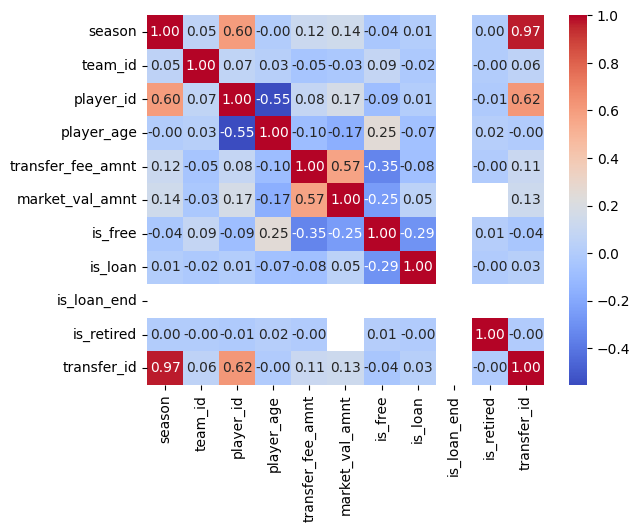

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Créez un heatmap de la matrice de corrélation
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()


In [ ]:
ligues_principales = ["GB1", "PO1", "IT1", "L1", "NL1", "FR1", "ES1"]

# Filtrer le DataFrame pour inclure uniquement les ligues principales
data_ligues_principales = data[data['league'].isin(ligues_principales)]

# Afficher les premières lignes du DataFrame résultant
print(data_ligues_principales.head())


   league  season window  team_id          team_name team_country   dir  \
0     GB1    2009      s      985  Manchester United      England    in   
1     GB1    2009      s      985  Manchester United      England    in   
2     GB1    2009      s      985  Manchester United      England    in   
3     GB1    2009      s      985  Manchester United      England    in   
12    GB1    2009      s      985  Manchester United      England  left   

    player_id        player_name  player_age  ... counter_team_id  \
0       33544   Antonio Valencia        23.0  ...            1071   
1       62049         Mame Diouf        21.0  ...             687   
2       43261    Gabriel Obertan        20.0  ...              40   
3        1397       Michael Owen        29.0  ...             762   
12       8198  Cristiano Ronaldo        24.0  ...             418   

        counter_team_name counter_team_country transfer_fee_amnt  \
0          Wigan Athletic              England        18800000.0  

In [ ]:
data_ligues_principales

,league,season,window,team_id,team_name,team_country,dir,player_id,player_name,player_age,...,counter_team_id,counter_team_name,counter_team_country,transfer_fee_amnt,market_val_amnt,is_free,is_loan,is_loan_end,is_retired,transfer_id
0,GB1,2009,s,985,Manchester United,England,in,33544,Antonio Valencia,23.0,...,1071,Wigan Athletic,England,18800000.0,NaN,False,False,False,False,310832
1,GB1,2009,s,985,Manchester United,England,in,62049,Mame Diouf,21.0,...,687,Molde FK,Norway,4500000.0,1600000.0,False,False,False,False,319841
2,GB1,2009,s,985,Manchester United,England,in,43261,Gabriel Obertan,20.0,...,40,FC Girondins Bordeaux,France,4000000.0,400000.0,False,False,False,False,315185
3,GB1,2009,s,985,Manchester United,England,in,1397,Michael Owen,29.0,...,762,Newcastle United,England,0.0,NaN,True,False,False,False,306421
12,GB1,2009,s,985,Manchester United,England,left,8198,Cristiano Ronaldo,24.0,...,418,Real Madrid,Spain,94000000.0,45000000.0,False,False,False,False,308498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69988,NL1,2021,s,403,Willem II Tilburg,Netherlands,left,324503,Vangelis Pavlidis,22.0,...,1090,AZ Alkmaar,Netherlands,2500000.0,2500000.0,False,False,False,False,3431541
69989,NL1,2021,s,403,Willem II Tilburg,Netherlands,left,480022,Dylan Ryan,21.0,...,404,FC Den Bosch,Netherlands,0.0,125000.0,True,False,False,False,3529980
69990,NL1,2021,s,403,Willem II Tilburg,Netherlands,left,417827,Victor van den Bogert,21.0,...,404,FC Den Bosch,Netherlands,0.0,225000.0,True,False,False,False,3313161
69991,NL1,2021,s,403,Willem II Tilburg,Netherlands,left,222320,Sebastian Holmén,29.0,...,126,Caykur Rizespor,Turkey,0.0,1200000.0,True,False,False,False,3386222


In [ ]:
import pandas as pd

# Supprimer les lignes avec des valeurs manquantes dans la colonne 'transfer_fee_amnt'
data = data.dropna(subset=['transfer_fee_amnt'])

# Calculer la moyenne des montants de transfert par poste
average_transfer_fee_by_position = data.groupby('player_pos')['transfer_fee_amnt'].mean()

# Trier les postes par montant moyen de transfert de la plus élevée à la plus basse
ranked_positions = average_transfer_fee_by_position.sort_values(ascending=False)

ranked_positions

player_pos
LW          4.398217e+06
SS          4.396624e+06
CF          4.099109e+06
RW          3.914799e+06
AM          3.613273e+06
CM          3.384210e+06
DM          2.908385e+06
CB          2.796614e+06
RB          2.534551e+06
LM          2.401207e+06
LB          2.181835e+06
GK          1.380104e+06
RM          1.357840e+06
attack      1.020833e+05
midfield    1.185185e+04
defence     0.000000e+00
Name: transfer_fee_amnt, dtype: float64

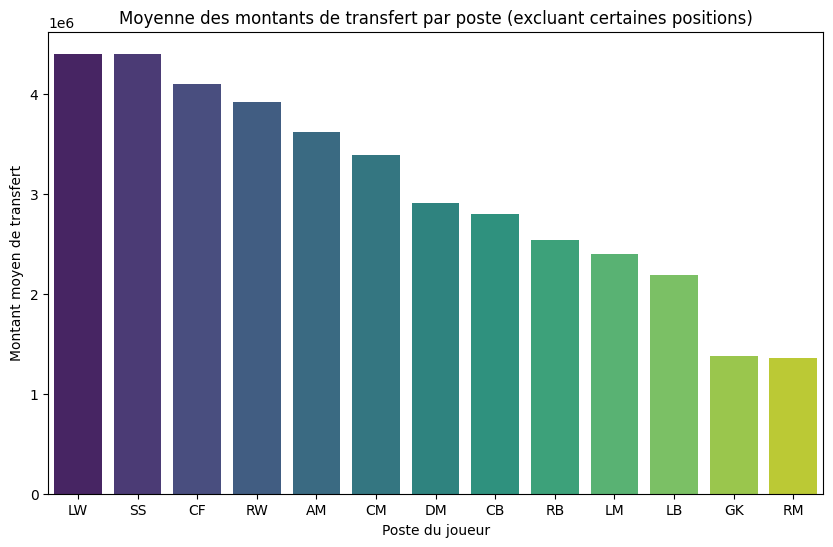

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Supprimer les lignes avec des valeurs manquantes dans la colonne 'transfer_fee_amnt'
data = data.dropna(subset=['transfer_fee_amnt'])

# Exclure certaines positions (attack, midfield, defence)
excluded_positions = ['attack', 'midfield', 'defence']
filtered_data = data[~data['player_pos'].isin(excluded_positions)]

# Calculer la moyenne des montants de transfert par poste
average_transfer_fee_by_position = filtered_data.groupby('player_pos')['transfer_fee_amnt'].mean()

# Trier les postes par montant moyen de transfert de la plus élevée à la plus basse
ranked_positions = average_transfer_fee_by_position.sort_values(ascending=False)

# Créer une figure et des axes
plt.figure(figsize=(10, 6))

# Tracer une courbe avec les postes sur l'axe des x et les montants moyens de transfert sur l'axe des y
sns.barplot(x=ranked_positions.index, y=ranked_positions.values, palette='viridis')

# Ajouter des titres et des étiquettes
plt.title('Moyenne des montants de transfert par poste (excluant certaines positions)')
plt.xlabel('Poste du joueur')
plt.ylabel('Montant moyen de transfert')

# Afficher le graphique
plt.show()



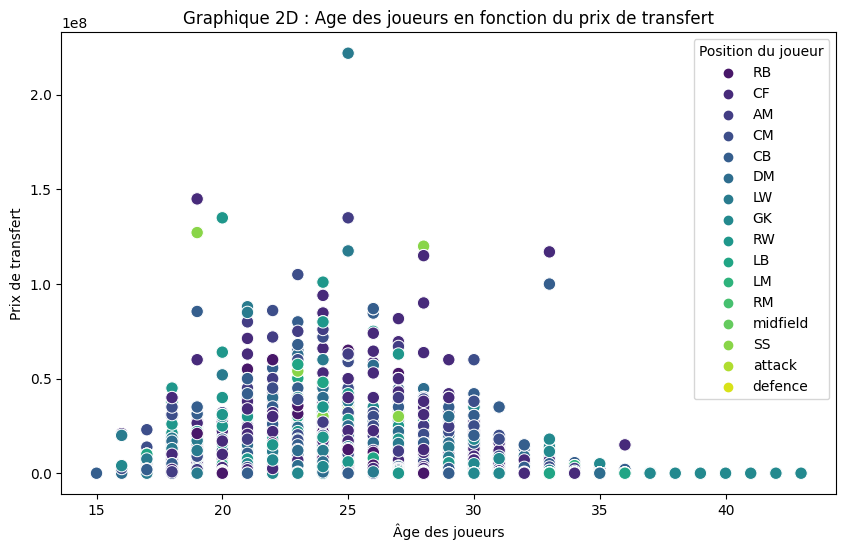

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


# Supprimer les lignes avec des valeurs manquantes dans les colonnes 'transfer_fee_amnt' et 'player_age'
data = data.dropna(subset=['transfer_fee_amnt', 'player_age'])

# Créer un scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='player_age', y='transfer_fee_amnt', data=data, hue='player_pos', palette='viridis', s=80)

# Ajouter des titres et des étiquettes
plt.title('Graphique 2D : Age des joueurs en fonction du prix de transfert')
plt.xlabel('Âge des joueurs')
plt.ylabel('Prix de transfert')

# Afficher la légende
plt.legend(title='Position du joueur')

# Afficher le graphique
plt.show()


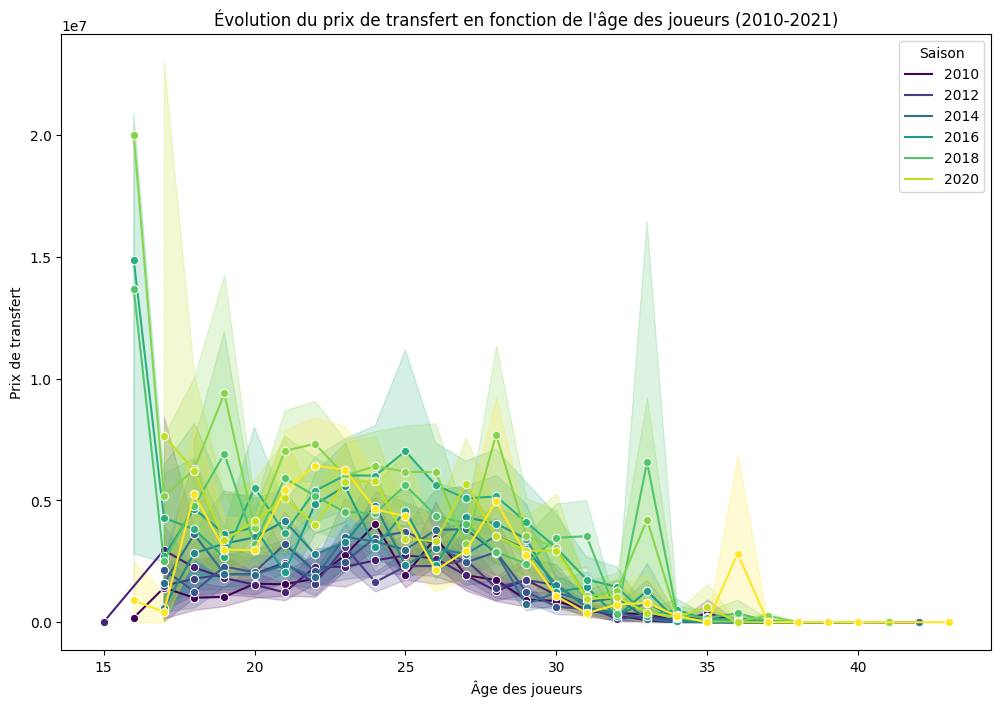

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


# Supprimer les lignes avec des valeurs manquantes dans les colonnes 'transfer_fee_amnt', 'player_age' et 'season'
data = data.dropna(subset=['transfer_fee_amnt', 'player_age', 'season'])

# Filtrer les données pour la période de 2010 à 2021
data_filtered = data[(data['season'] >= 2010) & (data['season'] <= 2021)]

# Créer un line plot
plt.figure(figsize=(12, 8))
sns.lineplot(x='player_age', y='transfer_fee_amnt', data=data_filtered, hue='season', palette='viridis', marker='o')

# Ajouter des titres et des étiquettes
plt.title('Évolution du prix de transfert en fonction de l\'âge des joueurs (2010-2021)')
plt.xlabel('Âge des joueurs')
plt.ylabel('Prix de transfert')

# Afficher la légende
plt.legend(title='Saison')

# Afficher le graphique
plt.show()


<ipython-input-66-a98feb52d5ac>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='season', y='transfer_fee_amnt', data=data, ci=None, estimator='mean')


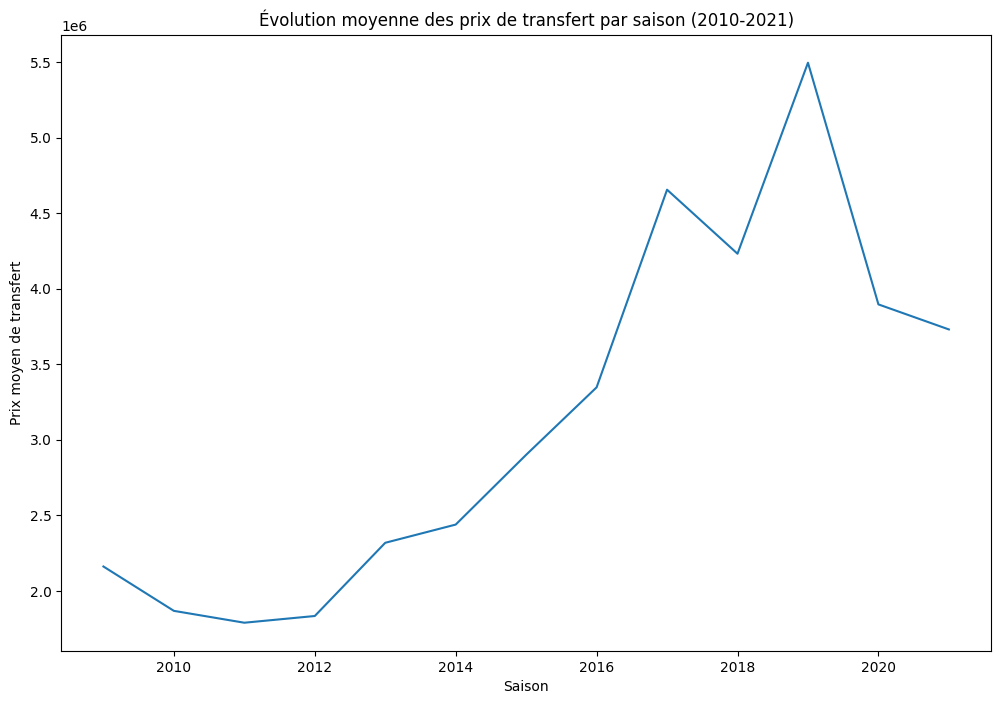

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Supprimer les lignes avec des valeurs manquantes dans la colonne 'transfer_fee_amnt' et 'season'
data = data.dropna(subset=['transfer_fee_amnt', 'season'])

# Créer un line plot avec la moyenne des prix de transfert pour chaque saison
plt.figure(figsize=(12, 8))
sns.lineplot(x='season', y='transfer_fee_amnt', data=data, ci=None, estimator='mean')

# Ajouter des titres et des étiquettes
plt.title('Évolution moyenne des prix de transfert par saison (2010-2021)')
plt.xlabel('Saison')
plt.ylabel('Prix moyen de transfert')

# Afficher le graphique
plt.show()
